In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

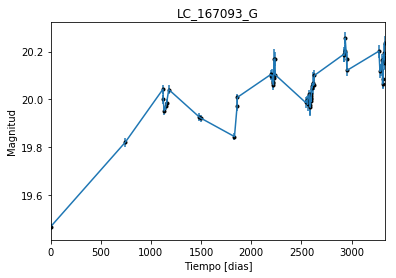

In [2]:
data = np.genfromtxt('LC_167093_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_167093_G')
plt.savefig("LC_167093_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

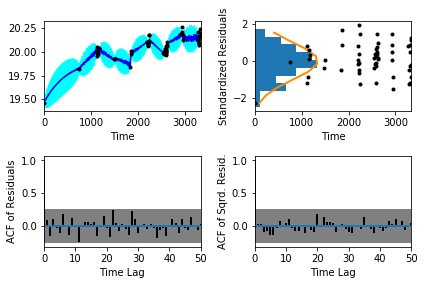

In [5]:
sample.assess_fit()

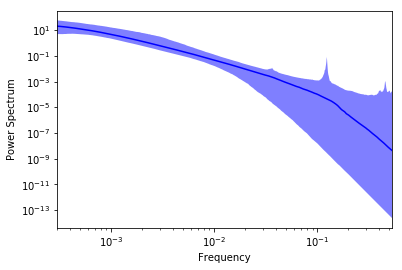

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

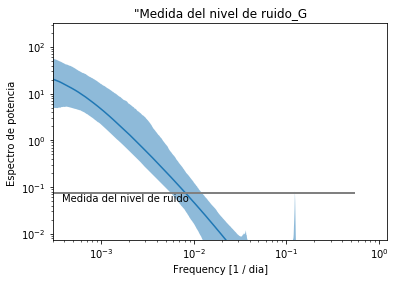

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_167093_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_167093_G')

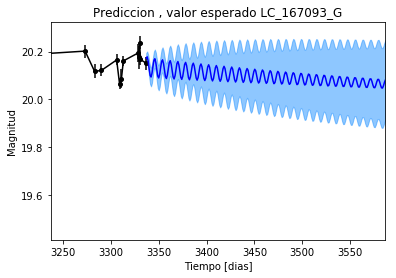

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_167093_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_167093_G')

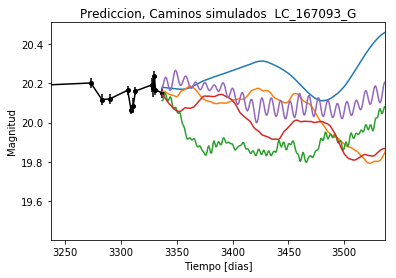

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_167093_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


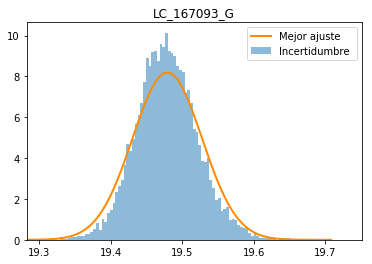

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_167093_G')
plt.savefig("Mejor_ajuste_LC_167093_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_167093_G')

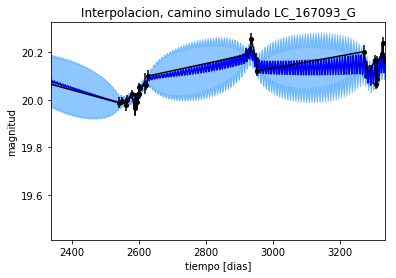

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_G')

Text(0.5,1,'Interpolacion, camino simulado LC_167093_G')

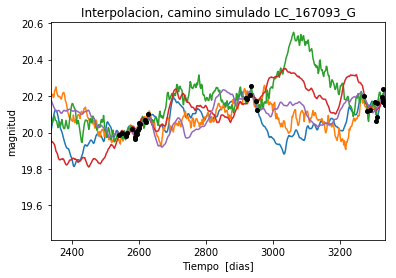

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 208.643329829
Median: 0.0186508812939
Standard deviation: 0.232184851965
68% credibility interval: [ 0.00121245  0.24841019]
95% credibility interval: [  3.85307008e-04   8.91961413e-01]
99% credibility interval: [  3.21645778e-04   1.02946130e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 375.275716273
Median: 0.00599973594962
Standard deviation: 0.123725691558
68% credibility interval: [ 0.00051005  0.06864746]
95% credibility interval: [  3.17322396e-04   4.55614551e-01]
99% credibility interval: [  3.04527749e-04   8.54691725e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 324.090626807
Median: 0.0810836904565


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 289.017104412
Median: 112.908715709
Standard deviation: 2.34308765448
68% credibility interval: [ 110.45884226  114.56613514]
95% credibility interval: [ 107.32754513  117.39206358]
99% credibility interval: [ 105.07610598  117.9174214 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 155.674642761
Median: 1.2047872639
Standard deviation: 2.90491416256
68% credibility interval: [ 0.20062679  5.71687597]
95% credibility interval: [ 0.04124419  9.98666874]
99% credibility interval: [  0.01667806  12.19568516]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 550.080225298
Median: 2.72470436521
Standard deviation: 12.6831432383
68% credibility interval: [  0.28906672  18.98234931]
95% credibility interval: [  1.42402913e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 5.51691741448e-29
Standard deviation: 1.14061948694e+143
68% credibility interval: [  1.71884156e-61   1.49139195e-07]
95% credibility interval: [  1.70948212e-141   2.10448380e+001]
99% credibility interval: [  3.00745908e-179   3.13538192e+081]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 649.822272478
Median: 19.9357162363
Standard deviation: 0.0989658366399
68% credibility interval: [ 19.83904595  20.0238257 ]
95% credibility interval: [ 19.73596382  20.12804131]
99% credibility interval: [ 19.64301604  20.20575968]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 208.363703313
Median: 0.121622979764
Standard deviation: 0.285826319473
68% credibility interval: [ 0.          0.54382773]
95% credibility interval: [ 0.          0.96694434]
99% credibility interval: [ 0.          1.04209356]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 208.363703313
Median: 0.121622979764
Standard deviation: 0.285826319473
68% credibility interval: [ 0.          0.54382773]
95% credibility interval: [ 0.          0.96694434]
99% credibility interval: [ 0.          1.04209356]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1302.95782375
Median: 0.0
Standard deviation: 0.000339379396909
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 289.017104412
Median: 112.908715709
Standard deviation: 2.34308765448
68% credibility interval: [ 110.45884226  114.56613514]
95% credibility interval: [ 107.32754513  117.39206358]
99% credibility interval: [ 105.07610598  117.9174214 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 828.796250069
Median: 0.0419468493707
Standard deviation: 0.0273436543888
68% credibility interval: [ 0.02817527  0.06465269]
95% credibility interval: [ 0.02061444  0.10694521]
99% credibility interval: [ 0.01748653  0.16772243]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1081.72147793
Median: 1.06711122747
Standard deviation: 0.221361531082
68% credibility interval: [ 0.8729353   1.30522467]
95% credibility interval: [ 0.71937323  1.5938794 ]
99% credibility interval: [ 0.66242815  1.79722049]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 573.896597027
Median: 0.00833948631846
Standard deviation: 0.322689176105
68% credibility interval: [ 0.00040949  0.16523756]
95% credibility interval: [  1.81538871e-06   9.77675390e-01]
99% credibility interval: [  9.36603740e-85   2.21992173e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 208.643329829
Median: (-0.117186943312-3.03561853166j)
Standard deviation: 2.3137695774
68% credibility interval: [-1.56080724-1.42560328j -0.00761806-0.7770483j ]
95% credibility interval: [ -5.60435885e+00+0.j          -2.42095533e-03-0.24495168j]
99% credibility interval: [ -6.46829610e+00+0.j          -2.02096003e-03-2.92206211j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 375.275716273
Median: (-0.0376974527656+2.92340436016j)
Standard deviation: 1.95693467082
68% credibility interval: [-0.43132474+0.14759499j -0.00320471+0.77973836j]
95% credibility interval: [ -2.86271065e+00+3.9347882j  -1.99379542e-03+0.j       ]
99% credibility interval: [ -5.37018649e+00+1.83283684j  -1.91340428e-03+0.j        ]
Posterio